# Developing an Intuition for Probability With Worked Examples

https://machinelearningmastery.com/how-to-develop-an-intuition-for-probability-with-worked-examples/

In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.style.use('bmh')

## 1. Birthday Problem

**Problem:** How many people are required so that any two people in the group have the same birthday with at least a 50-50 chance?

**Example - calculating the probability of no matching birthdays with a group size of three:**

* P(n=3) = 365/365 * 364/365 * 363/365
* P(n=3) = 99.18%

#### Solution:

n=2, 364/365, p=99.726 1-p=0.274
n=3, 363/365, p=99.180 1-p=0.820
n=4, 362/365, p=98.364 1-p=1.636
n=5, 361/365, p=97.286 1-p=2.714
n=6, 360/365, p=95.954 1-p=4.046
n=7, 359/365, p=94.376 1-p=5.624
n=8, 358/365, p=92.566 1-p=7.434
n=9, 357/365, p=90.538 1-p=9.462
n=10, 356/365, p=88.305 1-p=11.695
n=11, 355/365, p=85.886 1-p=14.114
n=12, 354/365, p=83.298 1-p=16.702
n=13, 353/365, p=80.559 1-p=19.441
n=14, 352/365, p=77.690 1-p=22.310
n=15, 351/365, p=74.710 1-p=25.290
n=16, 350/365, p=71.640 1-p=28.360
n=17, 349/365, p=68.499 1-p=31.501
n=18, 348/365, p=65.309 1-p=34.691
n=19, 347/365, p=62.088 1-p=37.912
n=20, 346/365, p=58.856 1-p=41.144
n=21, 345/365, p=55.631 1-p=44.369
n=22, 344/365, p=52.430 1-p=47.570
n=23, 343/365, p=49.270 1-p=50.730
n=24, 342/365, p=46.166 1-p=53.834
n=25, 341/365, p=43.130 1-p=56.870
n=26, 340/365, p=40.176 1-p=59.824
n=27, 339/365, p=37.314 1-p=62.686
n=28, 338/365, p=34.554 1-p=65.446
n=29, 337/365, p=31.903 1-p=68.097
n=30, 336/365, p=29.368 1-p=70.632


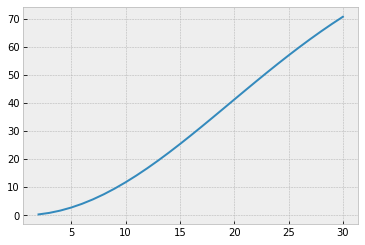

In [2]:
# group size
n = 30
# number of days in the year
days = 365
# calculate probability for different group sizes
p = days / days #1.0
proba_list = []
for i in range(1, n):
    av = days - i
    p *= av / days
    proba = (1-p)*100
    proba_list.append(proba)
    print('n=%d, %d/%d, p=%.3f 1-p=%.3f' % (i+1, av, days, p*100, (1-p)*100))
    
# Plot
plt.plot(range(2, n+1), proba_list)
plt.show()

#### Answer: n=23, 343/365, p=49.270 1-p=50.730

## 2. Boy or Girl Problem

In [3]:
probs = [
    ['Girl', 'Boy', 0.25],
    ['Boy', 'Boy', 0.25],
    ['Girl', 'Girl', 0.25],
    ['Boy', 'Girl', 0.25]
]

df = DataFrame(probs, columns=['Younger Child', 'Older Child', 'Unconditional Probability']) 
df

,Younger Child,Older Child,Unconditional Probability
0,Girl,Boy,0.25
1,Boy,Boy,0.25
2,Girl,Girl,0.25
3,Boy,Girl,0.25


### Case 1: A woman has two children and the oldest is a boy. What is the probability of this woman having two sons?

**Solution: use conditional probability.**

**P(A given B) = P(A and B) / P(B)**

**where:**

* **Event A = "2 boys"**

* **Event B = "oldest is a boy"**

P(boy-boy | {boy-boy or girl-boy}) 

= P(boy-boy and {boy-boy or girl-boy}) / P({boy-boy or girl-boy})

**Important: P(A and B) = P(A), if event A is a subset of event B.**

**If A is a subset of B then A implies the occurrence of B.**

**P(A and B) = P(A) * P(B) = P(A) * 1.0**

= P(boy-boy) / P({boy-boy or girl-boy})

= P(boy-boy) / (P(boy-boy) + P(girl-boy))

= 0.25 / (0.25 + 0.25)

= 0.25 / 0.5

= 0.5


### Case 2: A woman has two children and one of them is a boy. What is the probability of this woman having two sons?

**Solution: again, use conditional probability.**

**P(A given B) = P(A and B) / P(B)**

**where:**

* **Event A = "2 boys"**

* **Event B = "at least 1 boy"**

P(boy-boy | {boy-boy or girl-boy or boy-girl})

= P(boy-boy and {boy-boy or girl-boy or boy-girl}) / P({boy-boy or girl-boy or boy-girl})

= P(boy-boy) / P({boy-boy or girl-boy or boy-girl})

= P(boy-boy) / (P(boy-boy) + P(girl-boy) + P(boy-girl))

= 0.25 / (0.25 + 0.25 + 0.25)

= 0.25 / 0.75

= 0.333


## 3. Monty Hall Problem

**Problem:** The contestant is given a choice of three doors. Behind one is a car, behind the other two are goats. Once a door is chosen, the host, who knows where the car is, opens another door, which has a goat, and asks the contestant if they wish to keep their choice or change to the other unopened door.

### Solution 1:

In [4]:
lst = [
    ['Goat', 'Goat', 'Car', 'Goat', 'Car'], 
    ['Goat', 'Car', 'Goat', 'Goat', 'Car'], 
    ['Car', 'Goat', 'Goat', 'Car', 'Goat']
]

df = DataFrame(lst, columns=['Door 1', 'Door 2', 'Door 3', 'Stay', 'Switch']) 
df

,Door 1,Door 2,Door 3,Stay,Switch
0,Goat,Goat,Car,Goat,Car
1,Goat,Car,Goat,Goat,Car
2,Car,Goat,Goat,Car,Goat


If the contestant first selects **door 1**, the host can open only door 2 or 3 containing a goat.

We can see that 2/3 cases of switching result in winning a car (first two rows), and that 1/3 gives the car if we stay (final row).

**Answer: The contestant has a 2/3 or 66.66% probability of winning the car if they switch.**

### Solution 2: using joint probability.

**1) Suppose that the contestant has chosen door 1.**

**2) Calculate the probability of the host opening door 3 if door 1 has the car.**

P(door1=car and door3=open)

= P(door1=car) * P(door3=open)

= 1/3 * 1/2

= 1/6

**3) Calculate the probability of the host opening door 3 if door 2 has the car.**

P(door2=car and door3=open)

= P(door2=car) * P(door3=open)

= 1/3 * 1

= 1/3

**Answer: The probability is higher that the car is behind door 2 (about 33%) than door 1 (about 16%).**